# playlist-plots

In [41]:
import pandas as pd
from dataget import *
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [43]:
# Top 5 most viewed playlist and its average sentiment.
query = """
SELECT p.playlist_name, SUM(v.view_count) AS total_view_count, AVG(c.sentiment) AS average_sentiment
FROM (SELECT video_id, playlist_id, view_count FROM videos
     ORDER BY view_count DESC LIMIT 5) v
JOIN playlists p ON v.playlist_id = p.playlist_id
LEFT JOIN comments c ON v.video_id = c.video_id
GROUP BY p.playlist_name ORDER BY total_view_count DESC;
"""

In [44]:
data_df = get_query(query)

RETURNED SOME DATA


In [50]:
data_df

,playlist_name,total_view_count,average_sentiment
0,MANGALAHARATHULU,9.063363e+13,0.062785
1,Sahi Siva | Official Music Videos,1.426219e+12,0.198324
2,Hari Patam,4.302129e+11,0.257095
3,Jataralu and Festivals,2.952580e+10,0.111654


In [53]:
df = data_df

C:\Users\Elamparithi\AppData\Local\Temp\ipykernel_15012\1198761232.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='playlist_name', y='total_view_count', palette='deep', ax=axes[1])
C:\Users\Elamparithi\AppData\Local\Temp\ipykernel_15012\1198761232.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='playlist_name', y='average_sentiment', palette='deep', ax=axes[2])


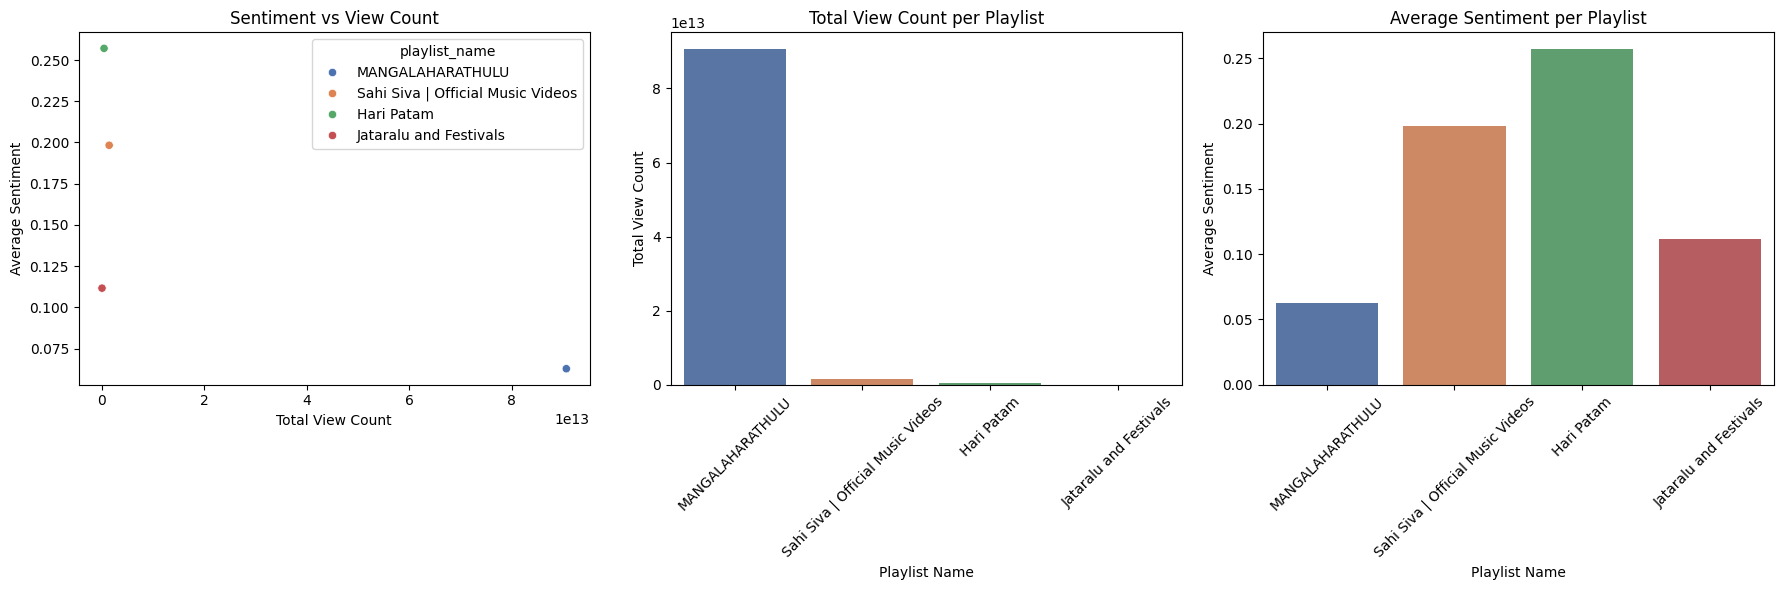

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Sentiment vs View Count
sns.scatterplot(data=df, x='total_view_count', y='average_sentiment', hue='playlist_name', palette='deep', ax=axes[0])
axes[0].set_title('Sentiment vs View Count')
axes[0].set_xlabel('Total View Count')
axes[0].set_ylabel('Average Sentiment')

# Second plot: Total View Count per Playlist
sns.barplot(data=df, x='playlist_name', y='total_view_count', palette='deep', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Total View Count per Playlist')
axes[1].set_xlabel('Playlist Name')
axes[1].set_ylabel('Total View Count')

# Third plot: Average Sentiment per Playlist
sns.barplot(data=df, x='playlist_name', y='average_sentiment', palette='deep', ax=axes[2])
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_title('Average Sentiment per Playlist')
axes[2].set_xlabel('Playlist Name')
axes[2].set_ylabel('Average Sentiment')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()